# 銀行の顧客ターゲティング

### 目次
**1. ライブラリのインポート**\
**2. データの読み込み**\
**3. 探索的データ分析**\
**4. データの前処理**\
**5. 学習・検証**\
**6. 予測結果の提出**

## 1. ライブラリのインポート

In [1]:
import warnings
warnings.simplefilter('ignore')

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import japanize_matplotlib
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, confusion_matrix
from sklearn.preprocessing import StandardScaler

## 2. データの読み込み

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
print('train shape', train.shape)
train.info()

train shape (27128, 18)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27128 entries, 0 to 27127
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         27128 non-null  int64 
 1   age        27128 non-null  int64 
 2   job        27128 non-null  object
 3   marital    27128 non-null  object
 4   education  27128 non-null  object
 5   default    27128 non-null  object
 6   balance    27128 non-null  int64 
 7   housing    27128 non-null  object
 8   loan       27128 non-null  object
 9   contact    27128 non-null  object
 10  day        27128 non-null  int64 
 11  month      27128 non-null  object
 12  duration   27128 non-null  int64 
 13  campaign   27128 non-null  int64 
 14  pdays      27128 non-null  int64 
 15  previous   27128 non-null  int64 
 16  poutcome   27128 non-null  object
 17  y          27128 non-null  int64 
dtypes: int64(9), object(9)
memory usage: 3.7+ MB


In [4]:
print('test shape', test.shape)
test.info()

test shape (18083, 17)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18083 entries, 0 to 18082
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         18083 non-null  int64 
 1   age        18083 non-null  int64 
 2   job        18083 non-null  object
 3   marital    18083 non-null  object
 4   education  18083 non-null  object
 5   default    18083 non-null  object
 6   balance    18083 non-null  int64 
 7   housing    18083 non-null  object
 8   loan       18083 non-null  object
 9   contact    18083 non-null  object
 10  day        18083 non-null  int64 
 11  month      18083 non-null  object
 12  duration   18083 non-null  int64 
 13  campaign   18083 non-null  int64 
 14  pdays      18083 non-null  int64 
 15  previous   18083 non-null  int64 
 16  poutcome   18083 non-null  object
dtypes: int64(8), object(9)
memory usage: 2.3+ MB


In [5]:
display(train.head(), test.head())

,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,1,39,blue-collar,married,secondary,no,1756,yes,no,cellular,3,apr,939,1,-1,0,unknown,1
1,2,51,entrepreneur,married,primary,no,1443,no,no,cellular,18,feb,172,10,-1,0,unknown,1
2,3,36,management,single,tertiary,no,436,no,no,cellular,13,apr,567,1,595,2,failure,1
3,4,63,retired,married,secondary,no,474,no,no,cellular,25,jan,423,1,-1,0,unknown,1
4,5,31,management,single,tertiary,no,354,no,no,cellular,30,apr,502,1,9,2,success,1


,id,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,1,30,management,single,tertiary,no,1028,no,no,cellular,4,feb,1294,2,-1,0,unknown
1,2,39,self-employed,single,tertiary,no,426,no,no,unknown,18,jun,1029,1,-1,0,unknown
2,3,38,technician,single,tertiary,no,-572,yes,yes,unknown,5,jun,26,24,-1,0,unknown
3,4,34,technician,single,secondary,no,-476,yes,no,unknown,27,may,92,4,-1,0,unknown
4,5,37,entrepreneur,married,primary,no,62,no,no,cellular,31,jul,404,2,-1,0,unknown


In [6]:
#欠損値の確認
train.isnull().sum()

id           0
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [7]:
test.isnull().sum()

id           0
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
dtype: int64

## 3. 探索的データ分析

まずはdescribeで数値データの統計値を算出してみます。

In [8]:
train.describe()

,id,age,balance,day,duration,campaign,pdays,previous,y
count,27128.000000,27128.000000,27128.000000,27128.000000,27128.000000,27128.000000,27128.000000,27128.000000,27128.000000
mean,13564.500000,40.951010,1355.800870,15.806215,260.711295,2.751769,40.528052,0.579733,0.117001
std,7831.323388,10.608542,3003.305272,8.337904,260.091727,3.126594,100.382462,2.503653,0.321427
min,1.000000,18.000000,-6847.000000,1.000000,0.000000,1.000000,-1.000000,0.000000,0.000000
25%,6782.750000,33.000000,72.000000,8.000000,104.000000,1.000000,-1.000000,0.000000,0.000000
50%,13564.500000,39.000000,449.000000,16.000000,182.000000,2.000000,-1.000000,0.000000,0.000000
75%,20346.250000,48.000000,1428.000000,21.000000,323.000000,3.000000,-1.000000,0.000000,0.000000
max,27128.000000,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000,1.000000


In [9]:
test.describe()

,id,age,balance,day,duration,campaign,pdays,previous
count,18083.000000,18083.000000,18083.000000,18083.000000,18083.000000,18083.000000,18083.000000,18083.000000
mean,9042.000000,40.914008,1371.980092,15.806725,254.340264,2.781950,39.702428,0.581209
std,5220.256794,10.634331,3105.985293,8.299509,253.591981,3.054651,99.747634,1.965265
min,1.000000,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,4521.500000,33.000000,72.000000,8.000000,102.000000,1.000000,-1.000000,0.000000
50%,9042.000000,39.000000,447.000000,16.000000,178.000000,2.000000,-1.000000,0.000000
75%,13562.500000,48.000000,1427.000000,21.000000,314.000000,3.000000,-1.000000,0.000000
max,18083.000000,95.000000,98417.000000,31.000000,3881.000000,50.000000,854.000000,58.000000


yの平均が0.117...であることからかなりの不均衡データであることがわかります。\
可視化してみましょう。

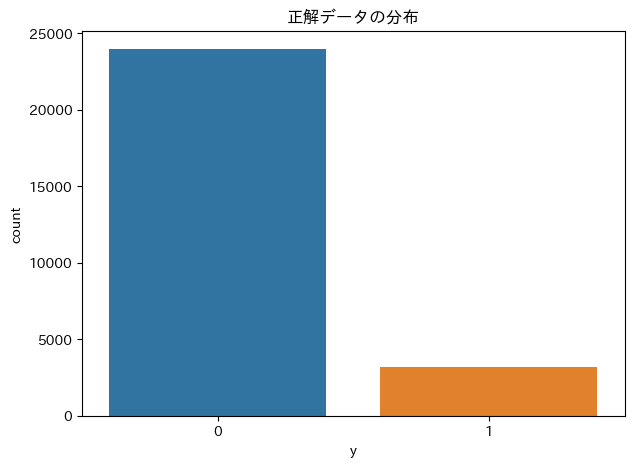

In [10]:
plt.figure(figsize=(7, 5))
sns.countplot(x=train['y'], data=train)
plt.title('正解データの分布')
plt.show()

次にカテゴリデータを見てみます。\
describeの引数にinclude=['O']を渡すことでカテゴリデータの統計値を確認できます。

In [11]:
#カテゴリデータを見るためのdesribe
train.describe(include=['O'])

,job,marital,education,default,housing,loan,contact,month,poutcome
count,27128,27128,27128,27128,27128,27128,27128,27128,27128
unique,12,3,4,2,2,2,3,12,4
top,blue-collar,married,secondary,no,yes,no,cellular,may,unknown
freq,5886,16411,13882,26644,15125,22788,17580,8317,22150


In [12]:
test.describe(include=['O'])

,job,marital,education,default,housing,loan,contact,month,poutcome
count,18083,18083,18083,18083,18083,18083,18083,18083,18083
unique,12,3,4,2,2,2,3,12,4
top,blue-collar,married,secondary,no,yes,no,cellular,may,unknown
freq,3846,10803,9320,17752,10005,15179,11705,5449,14809


それでは各特徴量とyとの関係性をグラフで可視化してみましょう。\
初めに数値データの相関係数を見てみます。

In [13]:
train.corr()

,id,age,balance,day,duration,campaign,pdays,previous,y
id,1.000000,-0.005716,-0.000484,0.002974,0.002705,0.016867,-0.004526,-0.005425,-0.003555
age,-0.005716,1.000000,0.095343,-0.008518,-0.005309,-0.001340,-0.025272,0.002946,0.020892
balance,-0.000484,0.095343,1.000000,0.002067,0.019923,-0.016295,0.003613,0.012483,0.045826
day,0.002974,-0.008518,0.002067,1.000000,-0.032453,0.164880,-0.096889,-0.050009,-0.031058
duration,0.002705,-0.005309,0.019923,-0.032453,1.000000,-0.087771,0.002030,0.002489,0.401390
campaign,0.016867,-0.001340,-0.016295,0.164880,-0.087771,1.000000,-0.086220,-0.031557,-0.076118
pdays,-0.004526,-0.025272,0.003613,-0.096889,0.002030,-0.086220,1.000000,0.421606,0.100930
previous,-0.005425,0.002946,0.012483,-0.050009,0.002489,-0.031557,0.421606,1.000000,0.083825
y,-0.003555,0.020892,0.045826,-0.031058,0.401390,-0.076118,0.100930,0.083825,1.000000


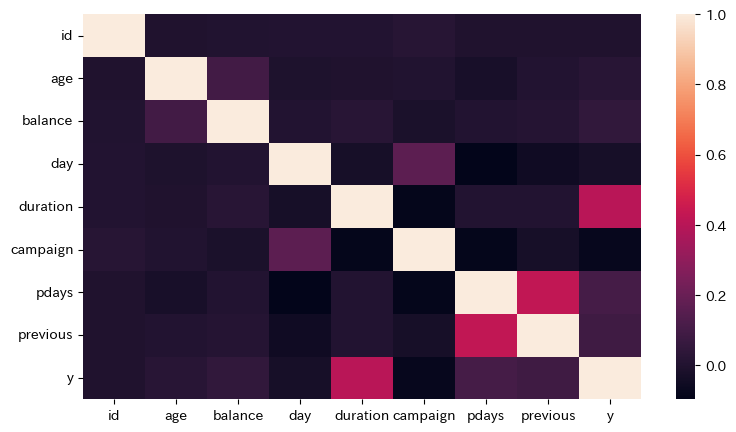

In [14]:
# ヒートマップで可視化
plt.figure(figsize=(9, 5))
sns.heatmap(train.corr())
plt.xticks(rotation=0)
plt.show()

duration, pdays, previousのそれぞれとyとの相関係数が少し高いことが確認できます。

それぞれyへの影響を可視化してみます。\
durationのような連続値の可視化には確率密度関数を使用します。

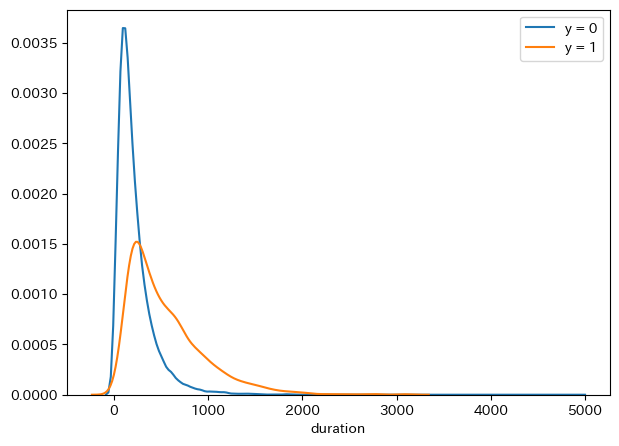

In [15]:
#kdeplotで確率密度関数可視化
plt.figure(figsize=(7, 5))
sns.kdeplot(train[train['y'] == 0]['duration'], label='y = 0')
sns.kdeplot(train[train['y'] == 1]['duration'], label='y = 1')
plt.legend()
plt.ylabel('')
plt.show()

durationの値が高いとyが1となる確率が高くなることがわかります。

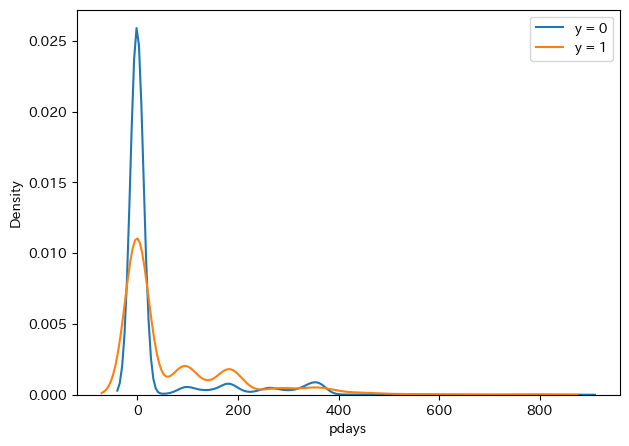

In [16]:
plt.figure(figsize=(7, 5))
sns.kdeplot(train[train['y'] == 0]['pdays'], label='y = 0')
sns.kdeplot(train[train['y'] == 1]['pdays'], label='y = 1')
plt.legend()
plt.show()

In [17]:
# 負の値があるように見えるので確認
train['pdays'].value_counts()

-1      22146
 182       98
 92        89
 91        73
 183       72
        ...  
 437        1
 603        1
 779        1
 541        1
 421        1
Name: pdays, Length: 491, dtype: int64

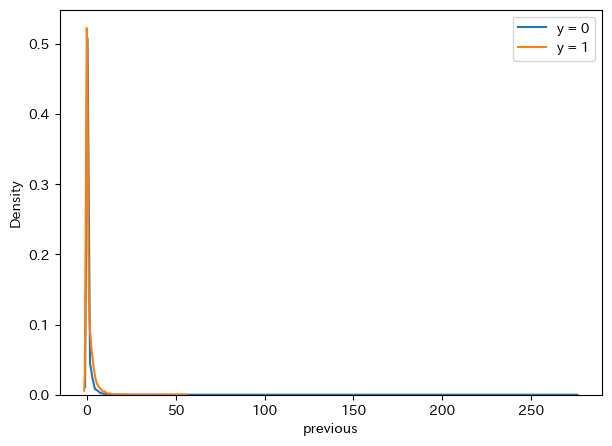

In [18]:
plt.figure(figsize=(7, 5))
sns.kdeplot(train[train['y'] == 0]['previous'], label='y = 0')
sns.kdeplot(train[train['y'] == 1]['previous'], label='y = 1')
plt.legend()
plt.show()

大きく偏ったグラフになりました。\
特にpdaysに関してはほとんどが-1であることがわかりました。\
それぞれに外れ値を含んでいることが見て取れます。\
箱ひげ図でも可視化してみます。

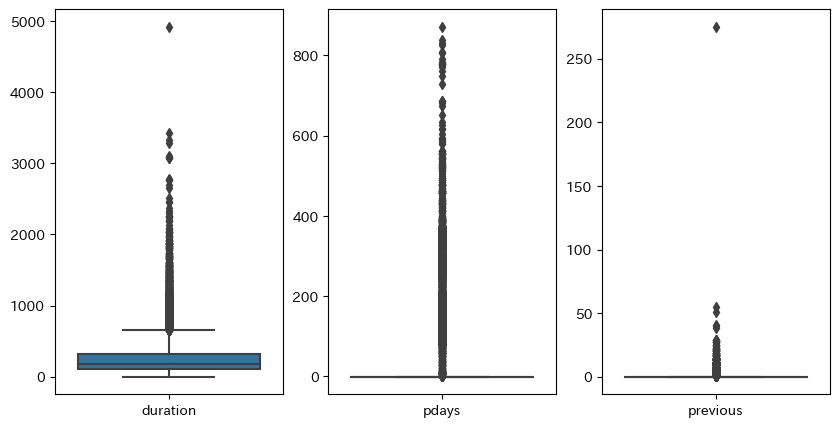

In [19]:
plt.figure(figsize=(10, 5))

plt.subplot(1, 3, 1)
sns.boxplot(train[['duration']])

plt.subplot(1, 3, 2)
sns.boxplot(train[['pdays']])

plt.subplot(1, 3, 3)
sns.boxplot(train[['previous']])

plt.show()

次にカテゴリデータを見ていきます。\
yと関係がありそうな職種とローンの有無を見ていきましょう。

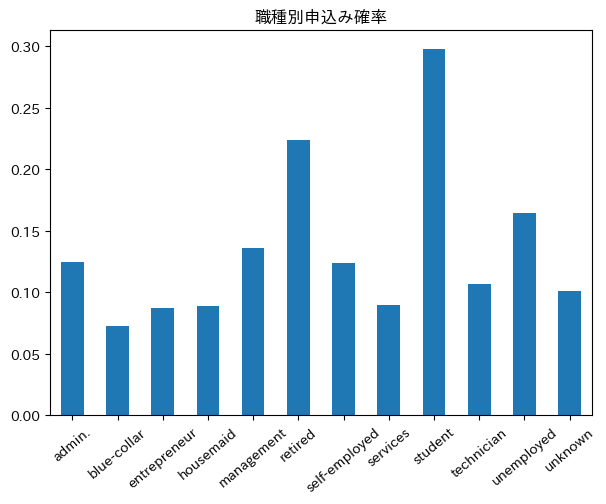

In [20]:
# 職種ごとのyの違い
plt.figure(figsize=(7, 5))
train.groupby('job')['y'].mean().plot.bar()
plt.xticks(rotation=40)
plt.title('職種別申込み確率')
plt.xlabel('')
plt.show()

学生や引退した人など労働者ではない場合にyの確率が高いことがわかります。

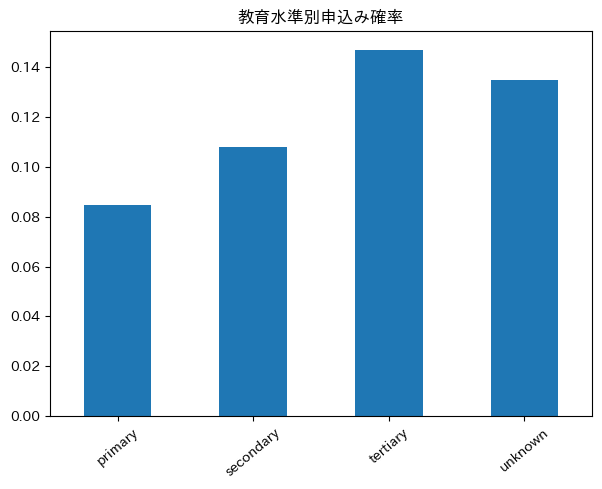

In [21]:
# educationごとのyの違い
plt.figure(figsize=(7, 5))
train.groupby('education')['y'].mean().plot.bar()
plt.xticks(rotation=40)
plt.title('教育水準別申込み確率')
plt.xlabel('')
plt.show()

isnullで欠損地は確認できませんでしたが、job,educationのそれぞれに欠損地のような意味を持つunknownが一定数あることがわかります。

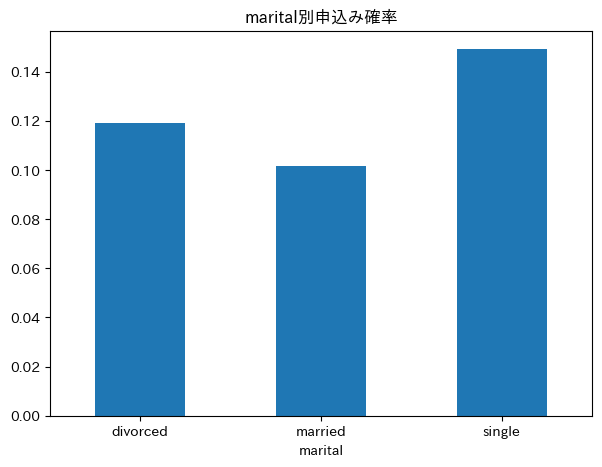

In [22]:
# 既婚かどうかによるyの違い
plt.figure(figsize=(7, 5))
train.groupby('marital')['y'].mean().plot.bar()
plt.title('marital別申込み確率')
plt.xticks(rotation=0)
plt.show()

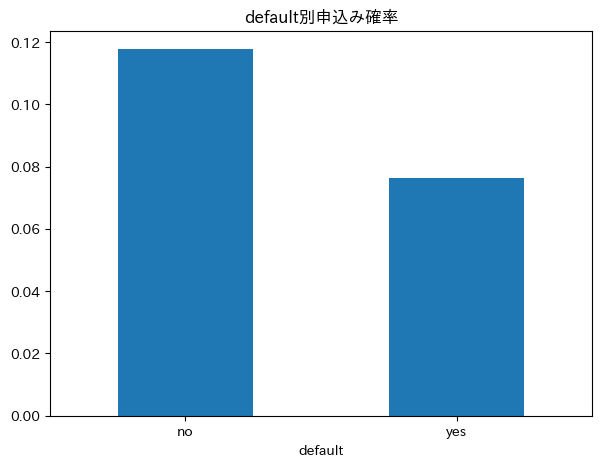

In [23]:
# 債務不履行があるかどうかによるyの違い
plt.figure(figsize=(7, 5))
train.groupby('default')['y'].mean().plot.bar()
plt.title('default別申込み確率')
plt.xticks(rotation=0)
plt.show()

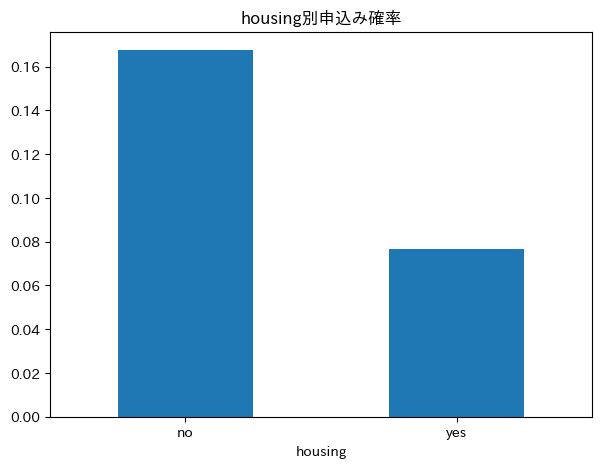

In [24]:
# 住宅ローンの有無によるyの違い
plt.figure(figsize=(7, 5))
train.groupby('housing')['y'].mean().plot.bar()
plt.title('housing別申込み確率')
plt.xticks(rotation=0)
plt.show()

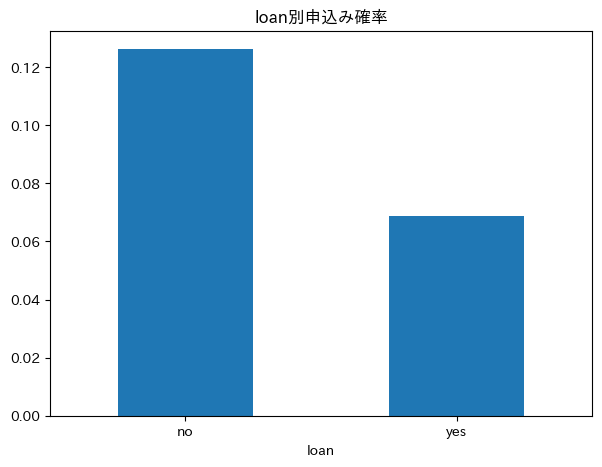

In [25]:
# 個人ローンの有無によるyの違い
plt.figure(figsize=(7, 5))
train.groupby('loan')['y'].mean().plot.bar()
plt.title('loan別申込み確率')
plt.xticks(rotation=0)
plt.show()

ここまでで、「過去に債務不履行がなく未婚で各種ローンを組んでいなければyが1である確率が高い」という傾向がつかめました。\
なんとなくでも、どんな人が申し込むのかイメージすることができたでしょうか。

## 4. データの前処理
目的変数との相関が高かったduration, pdays, previous\
そして可視化したjob, education, marital, default, housing, loanを\
特徴量として使用してみます。

In [26]:
use_columns = ['duration', 'pdays', 'previous', 'job', 'education', 'marital', 'default', 'housing', 'loan']
y = train['y']
train = train[use_columns]
test = test[use_columns]

In [27]:
train.head()

,duration,pdays,previous,job,education,marital,default,housing,loan
0,939,-1,0,blue-collar,secondary,married,no,yes,no
1,172,-1,0,entrepreneur,primary,married,no,no,no
2,567,595,2,management,tertiary,single,no,no,no
3,423,-1,0,retired,secondary,married,no,no,no
4,502,9,2,management,tertiary,single,no,no,no


In [28]:
# pdaysは-1とそれ以外で分ける
train.loc[train['pdays']>=0, 'pdays'] = 1 
train.loc[~train['pdays']>=0, 'pdays'] = 0

# previousは0とそれ以外で分ける
train.loc[train['previous']!=0, 'previous'] = 1

In [29]:
#カテゴリ変数のダミー変数化
train = pd.get_dummies(train, drop_first=True)
test = pd.get_dummies(test, drop_first=True)

In [30]:
display(train.head(), test.head())

,duration,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,...,job_unemployed,job_unknown,education_secondary,education_tertiary,education_unknown,marital_married,marital_single,default_yes,housing_yes,loan_yes
0,939,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,1,0
1,172,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,567,1,1,0,0,0,1,0,0,0,...,0,0,0,1,0,0,1,0,0,0
3,423,0,0,0,0,0,0,1,0,0,...,0,0,1,0,0,1,0,0,0,0
4,502,1,1,0,0,0,1,0,0,0,...,0,0,0,1,0,0,1,0,0,0


,duration,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,...,job_unemployed,job_unknown,education_secondary,education_tertiary,education_unknown,marital_married,marital_single,default_yes,housing_yes,loan_yes
0,1294,-1,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,1,0,0,0
1,1029,-1,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,1,0,0,0
2,26,-1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,1,1
3,92,-1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,1,0
4,404,-1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [31]:
print(train.shape)
print(test.shape)

(27128, 22)
(18083, 22)


durationが大きいので標準化します。

In [32]:
ss = StandardScaler()
train_ss = pd.DataFrame(ss.fit_transform(train), columns=train.columns)
test_ss = pd.DataFrame(ss.transform(test), columns=test.columns)

## 5. 学習・検証
今回は医療(病気になる確率)やマーケティング(契約率)などのキーワードでよく登場するロジスティック回帰を使用します。\
不均衡データにおいて対応しやすい点もメリットです。

In [33]:
# データの分割
X_train, X_valid, y_train, y_valid = train_test_split(train_ss, y, test_size=0.25, random_state=82, stratify=y)

In [34]:
# class_weightを設定することで不均衡データに対応
lr = LogisticRegression(random_state=82, class_weight='balanced')
lr.fit(X_train, y_train)

LogisticRegression(class_weight='balanced', random_state=82)

In [35]:
# 学習
lr.fit(X_train, y_train)
lr.fit(X_valid, y_valid)

# 予測・精度算出
train_pred = lr.predict(X_train)
valid_pred = lr.predict(X_valid)
print('train score : ', accuracy_score(y_train, train_pred))
print('valid score : ', accuracy_score(y_valid, valid_pred))

train score :  0.810773616435663
valid score :  0.8153936891772339


In [36]:
confusion_matrix(y_train, train_pred)

array([[14664,  3302],
       [  548,  1832]])

In [37]:
confusion_matrix(y_valid, valid_pred)

array([[4907, 1081],
       [ 171,  623]])

ちなみにclass_weightを調整しない場合を示しておきます。

In [38]:
lr_ = LogisticRegression(random_state=82)
lr_.fit(X_train, y_train)

# 学習
lr_.fit(X_train, y_train)
lr_.fit(X_valid, y_valid)

# 予測・精度算出
train_pred_ = lr_.predict(X_train)
valid_pred_ = lr_.predict(X_valid)
print('train score : ', accuracy_score(y_train, train_pred_))
print('valid score : ', accuracy_score(y_valid, valid_pred_))

train score :  0.8930010812936203
valid score :  0.8930993807136538


In [39]:
confusion_matrix(y_train, train_pred_)

array([[17622,   344],
       [ 1833,   547]])

In [40]:
confusion_matrix(y_valid, valid_pred_)

array([[5867,  121],
       [ 604,  190]])

class_weightを設定しない場合、正解率は高くなりますがconfusion_matrixから申込む人を予測できた数が少ないことがわかります。\
申込まない人の予測精度が高くてもあまり価値がありません。\
申込む人の予測も含め、正解率が上がるように分析していきましょう。

この練習問題の評価指標はAUCですのでそのスコアも確認します。

In [41]:
train_proba = lr.predict_proba(X_train)[:, 1]
valid_proba = lr.predict_proba(X_valid)[:, 1]

In [42]:
#AUCスコアでの精度
print("train AUC:", roc_auc_score(y_train, train_proba))
print("valid AUC:", roc_auc_score(y_valid, valid_proba))

train AUC: 0.8726113728358983
valid AUC: 0.8766224724848521


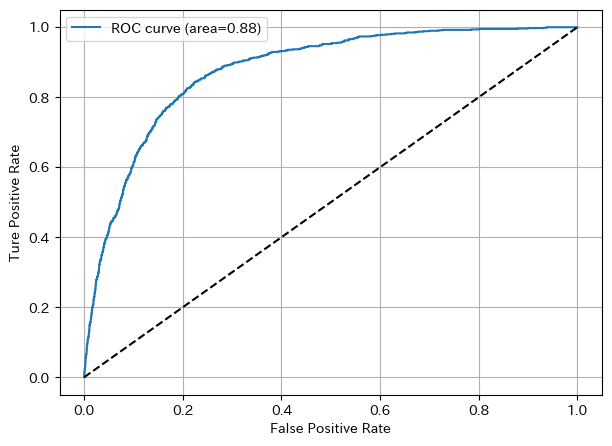

In [43]:
#AUCスコアの可視化
fpr, tpr, thresholds = roc_curve(y_valid, valid_proba)
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label=f"ROC curve (area={roc_auc_score(y_valid, valid_proba).round(2)})")
plt.plot([0, 1.0], [0,1.0], linestyle="--", color="black")
plt.xlabel('False Positive Rate')
plt.ylabel('Ture Positive Rate')
plt.legend()
plt.grid()
plt.show()

## 6.予測・結果の提出

In [44]:
# testデータの予測
predict = lr.predict_proba(test_ss)[:, 1]

In [45]:
# submit_sampleの読み込み、提出フォームの作成
submit = pd.read_csv('submit_sample.csv', header=None)
submit[1] = predict
submit.to_csv('submission_tutorial.csv', header=None,index=False)

In [46]:
submit.head()

,0,1
0,1,0.994799
1,2,0.965812
2,3,0.017560
3,4,0.042902
4,5,0.291693


### 最後に
結果は0.7985...でした。

このチュートリアルから発展させていくには、まず学習に利用する説明変数の数を増やすところから初めてみましょう。\
またnullはありませんでしたが、unknownというデータが含まれていましたので、最頻値や他の説明変数から傾向を掴み置き換えてみるのもいいかもしれません。\
その際には目的変数と説明変数の関係性についてグラフなどを用いて確認し、データセットの背景を掴んでみてください。
